In [1]:
#MAKE_volcano_plot_Rscript
#
#Designed to make volcano plot for every omics data (proteomics, metabolomics, autoantibody) 
#and every comparison (negVSpos, cVSpos, cVSneg, cVSra)
#
#Note: [1] P-value threshold for autoantibody : 0.05
#      [2] P-value threshold for autoantibody : 0.01

library(ggplot2)
library(ggrepel)

[1] "#####"
[1] "autoantibody"
[1] "negVSpos"
[1] "#####"


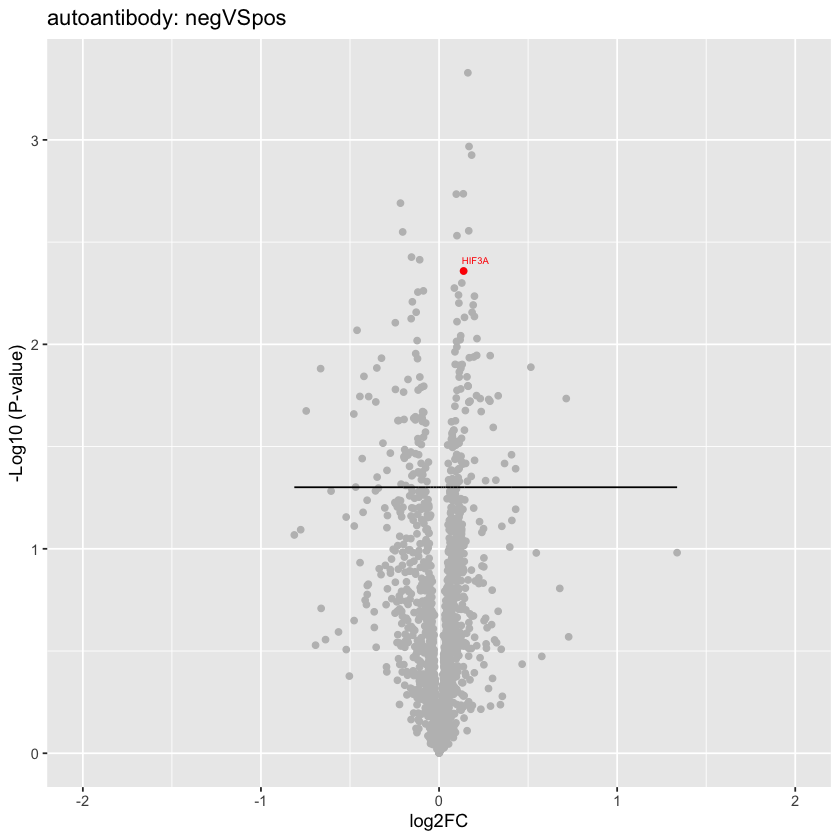

In [22]:
# omics_list = c("autoantibody","metabolomics","proteomics")
omics_list = c("autoantibody")
# condition_list = c("negVSpos","cVSpos","cVSneg","cVSra")
condition_list = c("negVSpos")

for (omics in omics_list){
    
    for (condition in condition_list){
        
        data_file = paste("../../../analysis/statistics/linear_model/differential_abundance_v2/", 
                          omics, ".", condition,".padj.v2.tsv", sep="")
        input_df = read.csv(data_file, sep="\t", header=TRUE, row.names=1)
        
        x_axis <- input_df$fc_case_control
        y_axis <- -log10(input_df$pval)
        cohenD <- input_df$cohenD

        gene_list <- rownames(input_df)
        
        #make dataframe for volcano plot
        #row names = gene list
        df <- do.call(rbind, Map(data.frame, 'log2FC'=x_axis, 'pval'=y_axis, 'cohenD'=cohenD))
        rownames(df) <- gene_list
        df$genes <- row.names(df)
        

        #Thresholds for data points color
        #pvalue 0.01 = 2 (-log10 pval)
        sig_subset <- subset(df, pval > 2)
        
        if (omics == "autoantibody"){ #since we decided to change the threshold of autoantibody profiles
            sig_subset <- subset(df, pval > 1.30103)
        }

        #filter out by Cohen's D
        sig_subset <- subset(sig_subset, cohenD > 0.5)
        
        #assign color of the dot (feature)
        find_feature <- subset(sig_subset, genes == "HIF3A") 
        # find_feature2 <- subset(sig_subset, genes == "HIF3A") 

        
        #Debug
        print ('#####')
        print (omics)
        print (condition)
        # print (nrow(sig_red_subset))
        # print (nrow(sig_blue_subset))
        print ('#####')
        #Debug

        figure_title = paste(omics,": ", condition, sep="")
        
        check_plot <- ggplot(df, aes(x=log2FC, y=pval))+ coord_cartesian(xlim=c(-2,2))+ 
        geom_point(colour="grey") + 
        geom_point(data = find_feature, colour='red') +
        # geom_point(data = find_feature2, colour='blue') +
        geom_line(aes(y=1.30103))+
        geom_text_repel(data=find_feature, aes(log2FC, pval, label=genes), colour='red', size=2) +
        # geom_text_repel(data=find_feature2, aes(log2FC, pval, label=genes), colour='blue', size=2) +
        ylab("-Log10 (P-value)") +
        ggtitle(figure_title)
        print (check_plot)
    }
}

In [5]:
sig_subset

,log2FC,pval,cohenD,genes
,<dbl>,<dbl>,<dbl>,<chr>
BIRC2,0.10084828,2.116517,0.6123176,BIRC2
ESR2,0.12808220,1.918622,0.5747660,ESR2
GNAZ,0.10295497,2.056905,0.6011688,GNAZ
GRK2,0.20962198,1.576547,0.5056898,GRK2
GSK3B,0.13389961,2.159648,0.6203019,GSK3B
HINFP,0.17017993,1.802426,0.5519463,HINFP
KAT2A,0.18343948,1.595712,0.5097214,KAT2A
KLF10,0.12249173,1.851368,0.5616326,KLF10
MAP2K5,0.10406522,2.029179,0.5959368,MAP2K5
